<a href="https://colab.research.google.com/github/RaeHickel/Summit_task/blob/main/Summit_task_Raghda_Haikal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = '/content/drive/MyDrive/Summit/student_job_fair_data.csv'
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,student_id,skills,experience_years,course_grades,projects_completed,extracurriculars,job_offer
0,1,Python;Data Analysis;SQL,3,75.26,9,0,1
1,2,Java,4,74.25,6,2,1
2,3,Data Analysis,2,74.89,4,3,0
3,4,Data Analysis,4,72.73,2,3,1
4,5,Machine Learning;Python;C++,4,84.85,1,4,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          20000 non-null  int64  
 1   skills              20000 non-null  object 
 2   experience_years    20000 non-null  int64  
 3   course_grades       20000 non-null  float64
 4   projects_completed  20000 non-null  int64  
 5   extracurriculars    20000 non-null  int64  
 6   job_offer           20000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.1+ MB


In [4]:
print(df.columns)


Index(['student_id', 'skills', 'experience_years', 'course_grades',
       'projects_completed', 'extracurriculars', 'job_offer'],
      dtype='object')


In [5]:
df.describe()

,student_id,experience_years,course_grades,projects_completed,extracurriculars,job_offer
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,2.499100,80.092985,4.524850,1.997100,0.493750
std,5773.647028,1.710861,11.519916,2.860278,1.413397,0.499973
min,1.000000,0.000000,60.000000,0.000000,0.000000,0.000000
25%,5000.750000,1.000000,70.127500,2.000000,1.000000,0.000000
50%,10000.500000,3.000000,80.170000,5.000000,2.000000,0.000000
75%,15000.250000,4.000000,90.000000,7.000000,3.000000,1.000000
max,20000.000000,5.000000,100.000000,9.000000,4.000000,1.000000


In [6]:
df.value_counts()

,,,,,,,count
student_id,skills,experience_years,course_grades,projects_completed,extracurriculars,job_offer,
19984,Python;SQL;Machine Learning,5,73.16,4,0,1,1
19983,Machine Learning;Python,5,76.95,1,3,0,1
19982,Java;SQL;C++,1,63.51,3,2,1,1
19981,Machine Learning;C++;Java,3,83.15,1,4,1,1
19980,SQL;Python;Java,0,69.17,5,0,0,1
...,...,...,...,...,...,...,...
5,Machine Learning;Python;C++,4,84.85,1,4,0,1
4,Data Analysis,4,72.73,2,3,1,1
3,Data Analysis,2,74.89,4,3,0,1


In [7]:
df['skills'].isnull().sum()


np.int64(0)

In [8]:
df.isnull().sum()

,0
student_id,0
skills,0
experience_years,0
course_grades,0
projects_completed,0
extracurriculars,0
job_offer,0


In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convert the text to actual Python lists
df['skills'] = df['skills'].apply(lambda x: [skill.strip() for skill in x.split(';')])

# Use MultiLabelBinarizer to one-hot encode the skills
mlb = MultiLabelBinarizer()
skills_encoded = mlb.fit_transform(df['skills'])

# Create a new dataframe from the encoded skills
skills_df = pd.DataFrame(skills_encoded, columns=mlb.classes_, index=df.index)

# Drop original skills column and concatenate new binary skill features
df = pd.concat([df.drop('skills', axis=1), skills_df], axis=1)


In [10]:
df.head()

,student_id,experience_years,course_grades,projects_completed,extracurriculars,job_offer,C++,Data Analysis,Java,Machine Learning,Python,SQL
0,1,3,75.26,9,0,1,0,1,0,0,1,1
1,2,4,74.25,6,2,1,0,0,1,0,0,0
2,3,2,74.89,4,3,0,0,1,0,0,0,0
3,4,4,72.73,2,3,1,0,1,0,0,0,0
4,5,4,84.85,1,4,0,1,0,0,1,1,0


In [11]:
df = df.drop_duplicates()


In [12]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          20000 non-null  int64  
 1   experience_years    20000 non-null  int64  
 2   course_grades       20000 non-null  float64
 3   projects_completed  20000 non-null  int64  
 4   extracurriculars    20000 non-null  int64  
 5   job_offer           20000 non-null  int64  
 6   C++                 20000 non-null  int64  
 7   Data Analysis       20000 non-null  int64  
 8   Java                20000 non-null  int64  
 9   Machine Learning    20000 non-null  int64  
 10  Python              20000 non-null  int64  
 11  SQL                 20000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 1.8 MB
None
         student_id  experience_years  course_grades  projects_completed  \
count  20000.000000      20000.000000   20000.000000        20000.000000 

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52      2010
           1       0.50      0.48      0.49      1990

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.51      0.51      0.51      4000

Confusion Matrix:


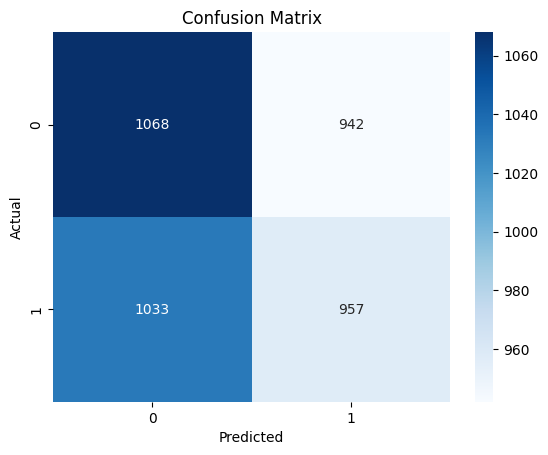

ROC AUC Score: 0.502
Cross-validated F1 Score: 0.482


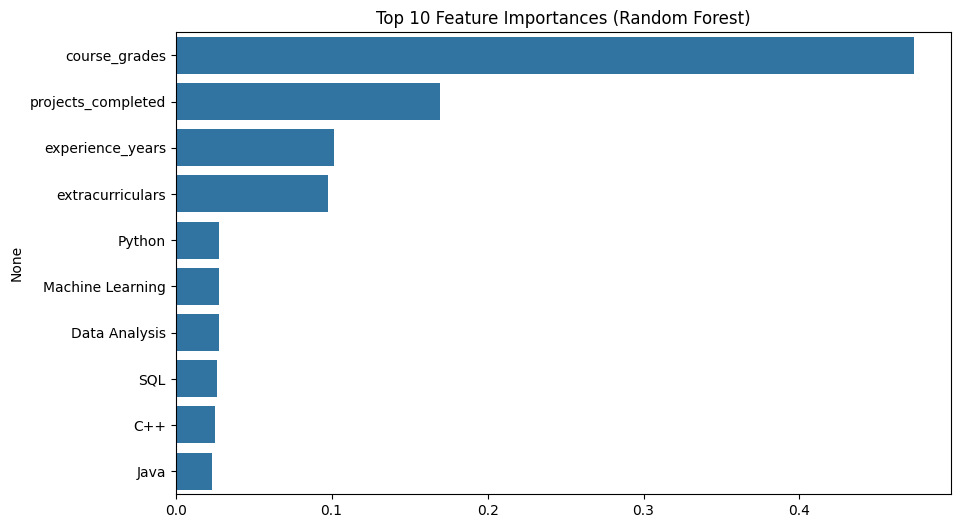

In [13]:
# Step 1: Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 2: Define X (features) and y (target)
X = df.drop(columns=['student_id', 'job_offer'])  # Drop ID and target
y = df['job_offer']

# Step 3: Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

# Step 6: Cross-validation score (average over 5 folds)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1')
print(f"Cross-validated F1 Score: {np.mean(cv_scores):.3f}")

# Step 7: Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:][::-1]  # Top 10 features

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()
